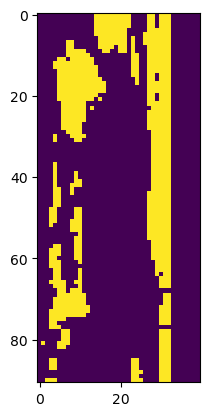

In [184]:
import numpy as np
import matplotlib.pyplot as plt

sample_chip = np.load("/explore/nobackup/projects/pix4dcloud/szhang16/abiChips/GOES-16/2019-261-71337_3568-3007-10850.npz", allow_pickle=True)
chip_data = sample_chip['data'].item()

cloudmask = chip_data['Cloud_mask_binary']
latitude = chip_data['Latitude'][45] # Get the middle latitude

plt.imshow(cloudSat)

In [185]:
cutoff = abs(np.cos(latitude/1.5))
HIGHB = cutoff * 10
MHIGHB = cutoff * 7
MLOWB = 2.5

In [186]:
# Convert to corresponding indices
HIGHB = HIGHB * 2
MHIGHB = MHIGHB * 2
MLOWB = MLOWB * 2

In [187]:
print(HIGHB, MHIGHB, MLOWB)

12.274476177925607 8.592133324547925 5.0


In [188]:
def classifyPixel(i: int):
    if i >= HIGHB:
        return 1
    if i >= MHIGHB:
        return 2
    if i >= MLOWB:
        return 3
    return 4

In [193]:
coloredmask = cloudmask.copy()

In [194]:
totalgroups = []
visited = np.zeros_like(cloudmask, dtype=int)
curgroups = np.zeros(5, dtype=int)
curcolor = 1

In [197]:
def dfs(i: int, j: int):
    visited[i][j] = 1
    coloredmask[i][j] = curcolor
    classVal = classifyPixel(j)
    curgroups[classVal] += 1
    if i < 90 and cloudmask[i+1][j] == 1 and visited[i+1][j] == 0:
        dfs(i+1, j)
    if i > 0 and cloudmask[i-1][j] == 1 and visited[i-1][j] == 0:
        dfs(i-1, j)
    if j < 39 and cloudmask[i][j+1] == 1 and visited[i][j+1] == 0:
        dfs(i, j+1)
    if j > 0 and cloudmask[i][j-1] == 1 and visited[i][j-1] == 0:
        dfs(i, j-1)

In [198]:
for i in range(len(cloudmask)):
    for j in range(len(cloudmask[0])):
        if cloudmask[i][j] == 0 or visited[i][j] != 0:
            continue
        curgroups = [0, 0, 0, 0, 0]
        dfs(i, j)
        curgroups[0] = curcolor
        totalgroups.append(curgroups)
        curcolor += 1

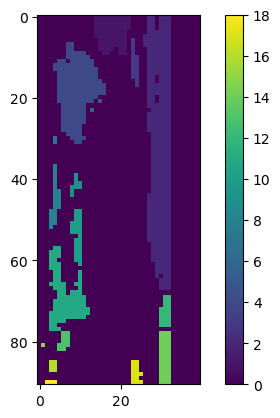

In [199]:
plt.imshow(coloredmask)
plt.colorbar()

In [200]:
totalgroups

[[1, 76, 0, 0, 0],
 [2, 364, 0, 0, 0],
 [3, 18, 0, 0, 0],
 [4, 26, 77, 75, 2],
 [5, 1, 0, 0, 0],
 [6, 1, 0, 0, 0],
 [7, 0, 0, 0, 2],
 [8, 0, 0, 5, 20],
 [9, 0, 6, 3, 0],
 [10, 0, 26, 3, 0],
 [11, 0, 28, 42, 30],
 [12, 21, 0, 0, 0],
 [13, 0, 0, 11, 0],
 [14, 26, 0, 0, 0],
 [15, 0, 0, 0, 1],
 [16, 0, 0, 0, 6],
 [17, 14, 0, 0, 0],
 [18, 0, 0, 0, 3]]